In [1]:
import pandas as pd
import datetime

In [2]:
# import results
pats = pd.read_csv("../Data/pats_results_2017.csv", encoding='utf-8')
jax = pd.read_csv("../Data/jax_results_2017.csv", encoding='utf-8')

In [3]:
# change datatype of columns
pats[['Week', 'TotYdO', 'TotYdD', 'Opp.1']] = \
    pats[['Week', 'TotYdO', 'TotYdD', 'Opp.1']].apply(pd.to_numeric, errors='coerce')
jax[['Week', 'TotYdO', 'TotYdD', 'Opp.1']] = \
    jax[['Week', 'TotYdO', 'TotYdD', 'Opp.1']].apply(pd.to_numeric, errors='coerce')

In [4]:

# get correlation for each team
corrp = pats['TotYdD'].corr(pats['Opp.1'], method='pearson')
corrj = jax['TotYdD'].corr(jax['Opp.1'], method='pearson')

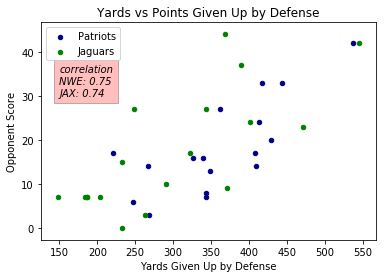

In [8]:
# plot each series in the same axis
%matplotlib inline
ax = pats.plot(title='Yards vs Points Given Up by Defense', kind='scatter', x='TotYdD', y='Opp.1', color='DarkBlue', label='Patriots')
jax.plot(kind='scatter', x='TotYdD', y='Opp.1', color='Green', label='Jaguars', ax=ax)
ax.set_xlabel('Yards Given Up by Defense')
ax.set_ylabel('Opponent Score')
ax.text(150, 30, 'correlation\nNWE: %.2f\nJAX: %.2f'%(corrp, corrj), style='italic',
        bbox={'facecolor':'red', 'alpha':0.25, 'pad':5})
